# Prise en main des concepts du Deep Learning

<br/>

##### Arnaud Deleruyelle : Doctorant SIGMA - BioComputing
##### Encadrement: John Klein (SIGMA) - Cristian Versari (BioComputing)

## Partie 1 : Initialisation du code

Nous allons traiter ce travail à l'aide de la bibliothèque Tensorflow de Google. 
Cette partie va se consacrer à la gestion des imports, la création des données etc...

### Section 1.1: Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import sin

### Section 1.2: Création d'un dataset artificiel

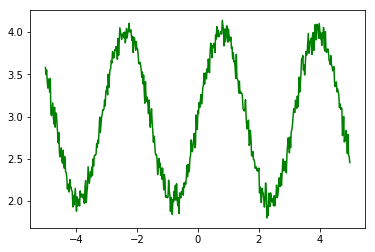

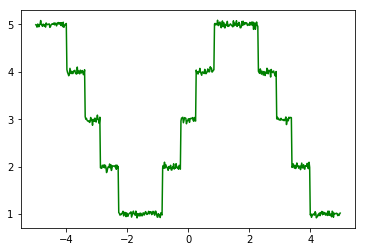

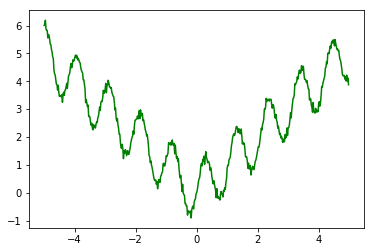

In [2]:
# dataset

def f_sin(x): return sin(2*x) + 3

def f_round(x): return round(2*sin(x) + 3)

def f_absin(x): return sin(6*x) + abs(x)


x_vals = np.arange(-5, 5, 0.02).reshape(500,1)
y_vals_f_sin = np.array([f_sin(x) + np.random.normal(0, 0.08) for x in x_vals])
y_vals_f_round = np.array([f_round(x) + np.random.normal(0, 0.04) for x in x_vals])
y_vals_f_absin = np.array([f_absin(x) + np.random.normal(0, 0.1) for x in x_vals])


nb_data = int(10 / 0.02)

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.show()

plt.plot(x_vals,y_vals_f_round, 'green')
plt.show()

plt.plot(x_vals,y_vals_f_absin, 'green')
plt.show()


### Section 1.3: Variables Globales

In [3]:
epochs = 20000
batch_size = 100

x = tf.placeholder(shape=[None, 1], dtype=tf.float64, name='x')
y = tf.placeholder(shape=[None, 1], dtype=tf.float64, name='y')

### Section 1.4: Fit

In [4]:
def Fit(x_vals,y_vals,model, verbose = 2000):
    sess = tf.Session()
    init_vars = tf.variables_initializer(tf.global_variables())
    sess.run(init_vars)
    for epoch in range(1,epochs):
        indices = np.random.choice(x_vals.shape[0], size=batch_size)
        x_batch = x_vals[indices].reshape((-1,1))
        x_batch = np.hstack([x_batch])
        y_batch = y_vals[indices].reshape((-1,1))
        feed_dict = {x: x_batch, y: y_batch}
        sess.run(model, feed_dict=feed_dict)
        if epoch%verbose ==0:
            print("Loss = ", sess.run(avg_llh, feed_dict=feed_dict))
    return sess

### Section 1.5: Predict

In [5]:
def Predict(x_vals,session):
    x_batch = np.hstack([x_vals.reshape((-1,1))])
    feed_dict = {x: x_batch}
    yh_vals = session.run((y_pred), feed_dict=feed_dict)
    return yh_vals

    

### Section 1.6: MLP

In [6]:
def MLP(x_vals,tab_neurones, tab_activation):
    outs = []
    for i in range(len(tab_neurones)):
        if i == 0 :
            input_nb_neurone = x_vals.shape[1]
            input_data = x
        else:
            input_nb_neurone = tab_neurones[i-1]
            input_data = outs[i-1]
        A = tf.Variable(np.random.rand(input_nb_neurone,tab_neurones[i]), dtype=tf.float64)
        b = tf.Variable(np.random.rand(tab_neurones[i]), dtype=tf.float64)
        if (tab_activation[i] == "relu"):
            out = tf.nn.relu(tf.matmul(input_data, A) + b)
        elif (tab_activation[i] == "sigmoid"):
            out = tf.nn.sigmoid(tf.matmul(input_data, A) + b)
        elif (tab_activation[i] == "tanh"):
            out = tf.tanh(tf.matmul(input_data, A) + b)
        else:
            out = tf.matmul(input_data, A) + b
        outs.append(out)
    return outs
        

### Section 1.7: Test d'un modèle

In [7]:
mlp1 = MLP(x_vals,[8,8,1], ['tanh','tanh','identity'])

# output layer
y_pred = mlp1[-1]

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
model = opt.minimize(avg_llh)

In [8]:
# fit the model
modelFit = Fit(x_vals,y_vals_f_sin,model)

Loss =  0.23866773463859353
Loss =  0.027716835887508572
Loss =  0.007113635806964947
Loss =  0.00701220073314064
Loss =  0.0077615664091193245
Loss =  0.008197771707121333
Loss =  0.007448728096189969
Loss =  0.00782014503946609
Loss =  0.006680832584416099


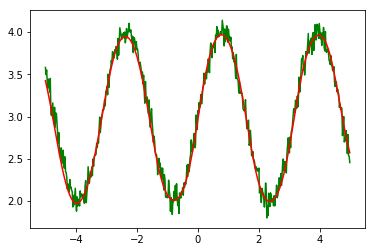

In [9]:
# predict 
modelPredict = Predict(x_vals,modelFit)

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,modelPredict, 'red')
plt.show()

## Partie 2: Utilisation des différentes fonctions d'activation.

Dans cette partie, nous allons étudier les 4 fonctions d'activation (Relu, sigmoide, tanh, identité).
Pour ce faire, nous avons choisi un optimiseur (Adam) de manière à ne changer que la couche d'activation.

### Section 2.1: fonction de test

In [10]:
# mse

def mse(y_pred,y):
    return np.mean(np.square(y_pred - y))

npArray1 = np.array([1,2,4])
npArray2 = np.array([1,3,7])

print("mse = " + str(mse(npArray1,npArray2)))

# mae

def mae(y_pred,y):
    return np.mean(np.abs(y_pred - y))

print("mae = " + str(mae(npArray1,npArray2)))

mse = 3.3333333333333335
mae = 1.3333333333333333


In [11]:
# test with mean of n launch

def testFunctionActivation(n, x_vals, y_vals, model):
    liste_result = []
    for i in range(n):
        session = Fit(x_vals, y_vals, model, verbose = 20000)
        y_result = Predict(x_vals,session)
        liste_result.append(y_result)
        session.close()
    result = np.mean(liste_result, axis = 0)
    return result.reshape(nb_data,1)
        

### Section 2.2: Relu

In [12]:
# model with Relu

mlp_relu = MLP(x_vals,[8,8,1], ['relu','relu','identity'])

# output layer
y_pred = mlp_relu[-1]

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelRelu = opt.minimize(avg_llh)

In [13]:
# train model
resRelu_sin = testFunctionActivation(10,x_vals,y_vals_f_sin,modelRelu)
resRelu_round = testFunctionActivation(10,x_vals,y_vals_f_round,modelRelu)
resRelu_absin = testFunctionActivation(10,x_vals,y_vals_f_absin,modelRelu)

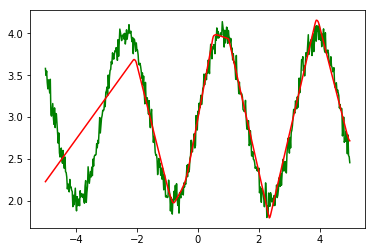

mae = 0.7598845418271123
mse = 0.8589963558110407


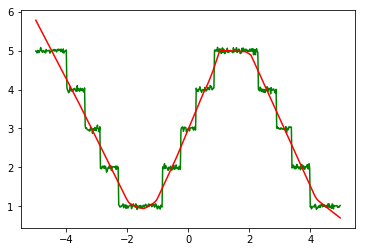

mae = 1.7321170457279376
mse = 4.554397955635722


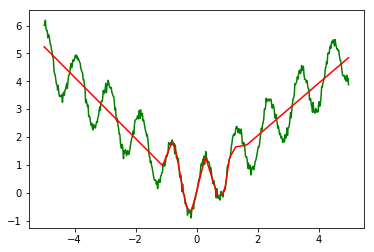

mae = 0.5118130757061983
mse = 0.3890403688404397


In [14]:
# print result

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,resRelu_sin, 'red')
plt.show()

print( "mae = " + str(mae(resRelu_sin,y_vals_f_sin)))
print( "mse = " + str(mse(resRelu_sin,y_vals_f_sin)))


plt.plot(x_vals,y_vals_f_round, 'green')
plt.plot(x_vals,resRelu_round, 'red')
plt.show()

print( "mae = " + str(mae(resRelu_round,y_vals_f_round)))
print( "mse = " + str(mse(resRelu_round,y_vals_f_round)))


plt.plot(x_vals,y_vals_f_absin, 'green')
plt.plot(x_vals,resRelu_absin, 'red')
plt.show()

print( "mae = " + str(mae(resRelu_absin,y_vals_f_absin)))
print( "mse = " + str(mse(resRelu_absin,y_vals_f_absin)))

### Section 2.3: Sigmoide

In [15]:
# model with sigmoid

mlp_sigmoid = MLP(x_vals,[8,8,1], ['sigmoid','sigmoid','identity'])

# output layer
y_pred = mlp_sigmoid[-1]


# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelSigmoid = opt.minimize(avg_llh)

In [16]:
# train model
resSigmoid_sin = testFunctionActivation(10,x_vals,y_vals_f_sin,modelSigmoid)
resSigmoid_round = testFunctionActivation(10,x_vals,y_vals_f_round,modelSigmoid)
resSigmoid_absin = testFunctionActivation(10,x_vals,y_vals_f_absin,modelSigmoid)

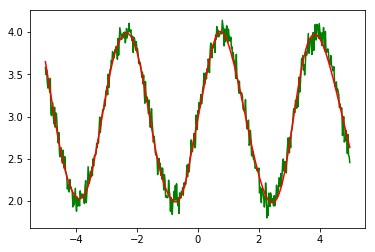

mae = 0.7976478814146398
mse = 0.9611521671636682


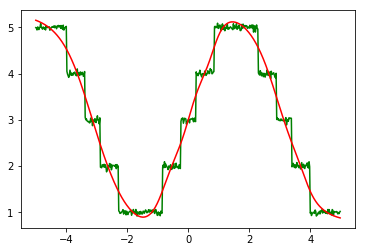

mae = 1.7354317240751251
mse = 4.5910148119136265


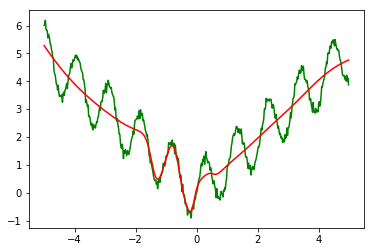

mae = 0.5317606638265986
mse = 0.3974102894668772


In [17]:
# print result

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,resSigmoid_sin, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid_sin,y_vals_f_sin)))
print( "mse = " + str(mse(resSigmoid_sin,y_vals_f_sin)))


plt.plot(x_vals,y_vals_f_round, 'green')
plt.plot(x_vals,resSigmoid_round, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid_round,y_vals_f_round)))
print( "mse = " + str(mse(resSigmoid_round,y_vals_f_round)))


plt.plot(x_vals,y_vals_f_absin, 'green')
plt.plot(x_vals,resSigmoid_absin, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid_absin,y_vals_f_absin)))
print( "mse = " + str(mse(resSigmoid_absin,y_vals_f_absin)))

### Section 2.4: Tanh

In [18]:
# model with tanh

mlp_tanh = MLP(x_vals,[8,8,1], ['tanh','tanh','identity'])

# output layer
y_pred = mlp_tanh[-1]


# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelTanh = opt.minimize(avg_llh)

In [19]:
# train model
resTanh_sin = testFunctionActivation(10,x_vals,y_vals_f_sin,modelTanh)
resTanh_round = testFunctionActivation(10,x_vals,y_vals_f_round,modelTanh)
resTanh_absin = testFunctionActivation(10,x_vals,y_vals_f_absin,modelTanh)

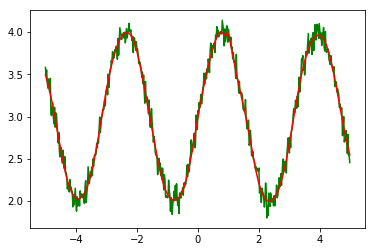

mae = 0.7995965483214263
mse = 0.9665027234331094


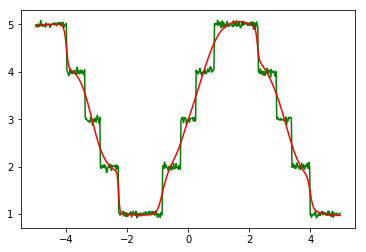

mae = 1.7276991892226383
mse = 4.588266549864862


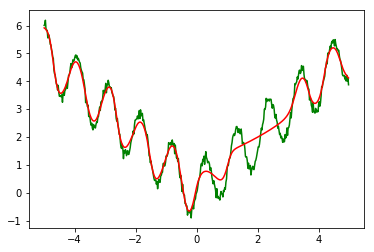

mae = 0.25772746493316545
mse = 0.13225904836368313


In [20]:
# print result

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,resTanh_sin, 'red')
plt.show()

print( "mae = " + str(mae(resTanh_sin,y_vals_f_sin)))
print( "mse = " + str(mse(resTanh_sin,y_vals_f_sin)))


plt.plot(x_vals,y_vals_f_round, 'green')
plt.plot(x_vals,resTanh_round, 'red')
plt.show()

print( "mae = " + str(mae(resTanh_round,y_vals_f_round)))
print( "mse = " + str(mse(resTanh_round,y_vals_f_round)))


plt.plot(x_vals,y_vals_f_absin, 'green')
plt.plot(x_vals,resTanh_absin, 'red')
plt.show()

print( "mae = " + str(mae(resTanh_absin,y_vals_f_absin)))
print( "mse = " + str(mse(resTanh_absin,y_vals_f_absin)))

### Section 2.4: Identité

In [21]:
# model without activation

mlp_id = MLP(x_vals,[8,8,1], ['identity','identity','identity'])

# output layer
y_pred = mlp_id[-1]


# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelId = opt.minimize(avg_llh)

In [22]:
# train model
resId_sin = testFunctionActivation(10,x_vals,y_vals_f_sin,modelId)
resId_round = testFunctionActivation(10,x_vals,y_vals_f_round,modelId)
resId_absin = testFunctionActivation(10,x_vals,y_vals_f_absin,modelId)

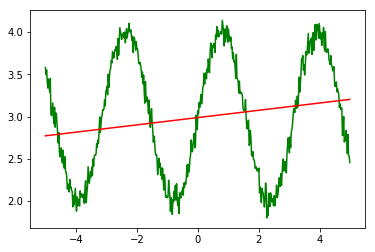

mae = 0.6271716510949709
mse = 0.5037206433665204


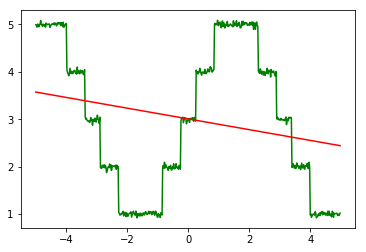

mae = 1.382755131035996
mse = 2.4274099295873848


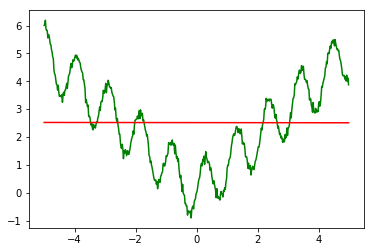

mae = 1.3517522735668763
mse = 2.5917721829129596


In [23]:
# print result

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,resId_sin, 'red')
plt.show()

print( "mae = " + str(mae(resId_sin,y_vals_f_sin)))
print( "mse = " + str(mse(resId_sin,y_vals_f_sin)))


plt.plot(x_vals,y_vals_f_round, 'green')
plt.plot(x_vals,resId_round, 'red')
plt.show()

print( "mae = " + str(mae(resId_round,y_vals_f_round)))
print( "mse = " + str(mse(resId_round,y_vals_f_round)))


plt.plot(x_vals,y_vals_f_absin, 'green')
plt.plot(x_vals,resId_absin, 'red')
plt.show()

print( "mae = " + str(mae(resId_absin,y_vals_f_absin)))
print( "mse = " + str(mse(resId_absin,y_vals_f_absin)))